In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
pd.set_option('display.max_rows', None)

In [38]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from pandas.plotting import autocorrelation_plot

In [3]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")

# EDA

In [4]:
train_df.head()

,Day,GrocerySales
0,1,8418.59
1,2,8447.47
2,3,8336.49
3,4,8579.17
4,5,8524.31


In [5]:
train_df.tail()

,Day,GrocerySales
687,688,8848.98
688,689,8800.45
689,690,9197.99
690,691,9062.44
691,692,8963.12


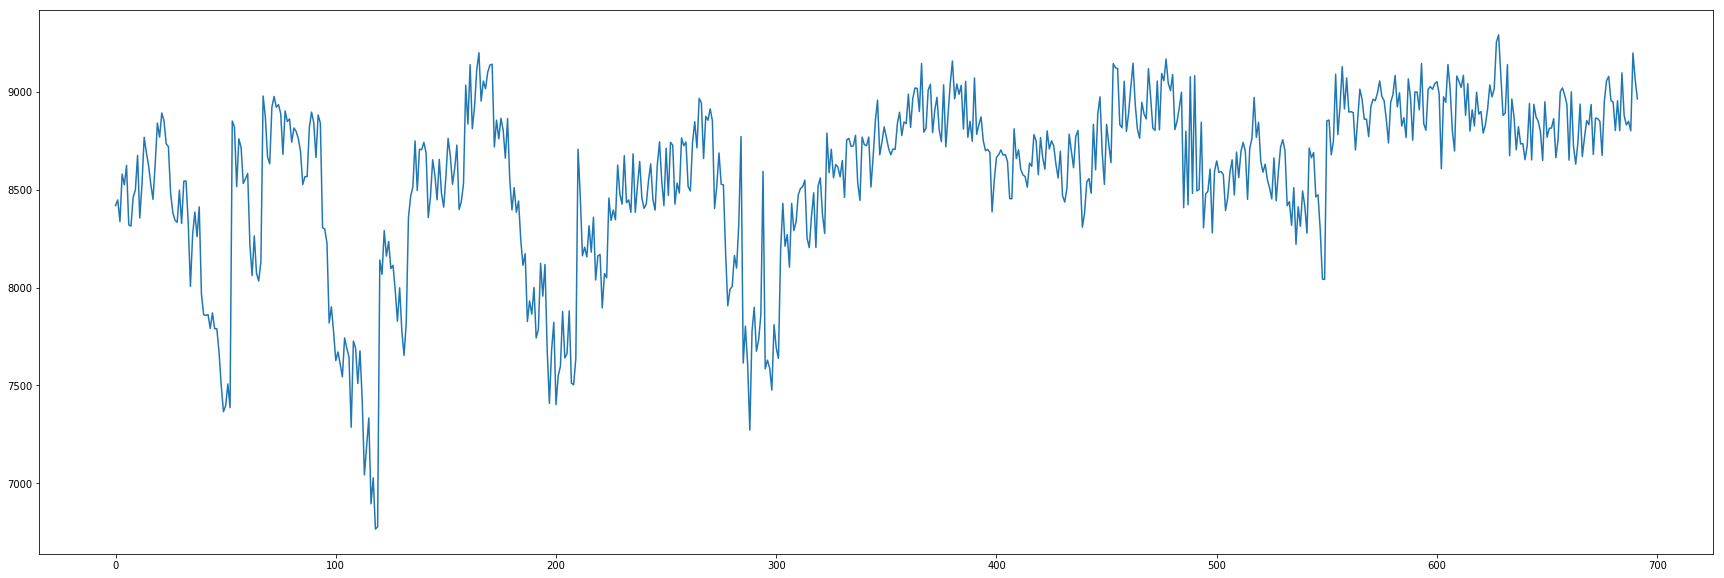

In [12]:
plt.figure(figsize=(30, 10))
plt.plot(train_df["GrocerySales"])

In [10]:
train_df.describe()

,Day,GrocerySales
count,692.000000,692.000000
mean,346.500000,8564.733471
std,199.907479,428.815668
min,1.000000,6766.370000
25%,173.750000,8411.536858
50%,346.500000,8677.770000
75%,519.250000,8852.387500
max,692.000000,9290.020000


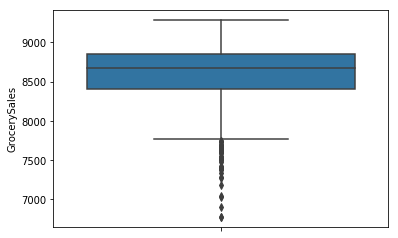

In [15]:
sns.boxplot(y=train_df["GrocerySales"])

In [17]:
# Check for missing values
train_df.isna().sum()

Day             0
GrocerySales    0
dtype: int64

In [29]:
# determine rolling mean and std
rol_mean = train_df["GrocerySales"].rolling(window=1).mean()
rol_std = train_df["GrocerySales"].rolling(window=1).std()

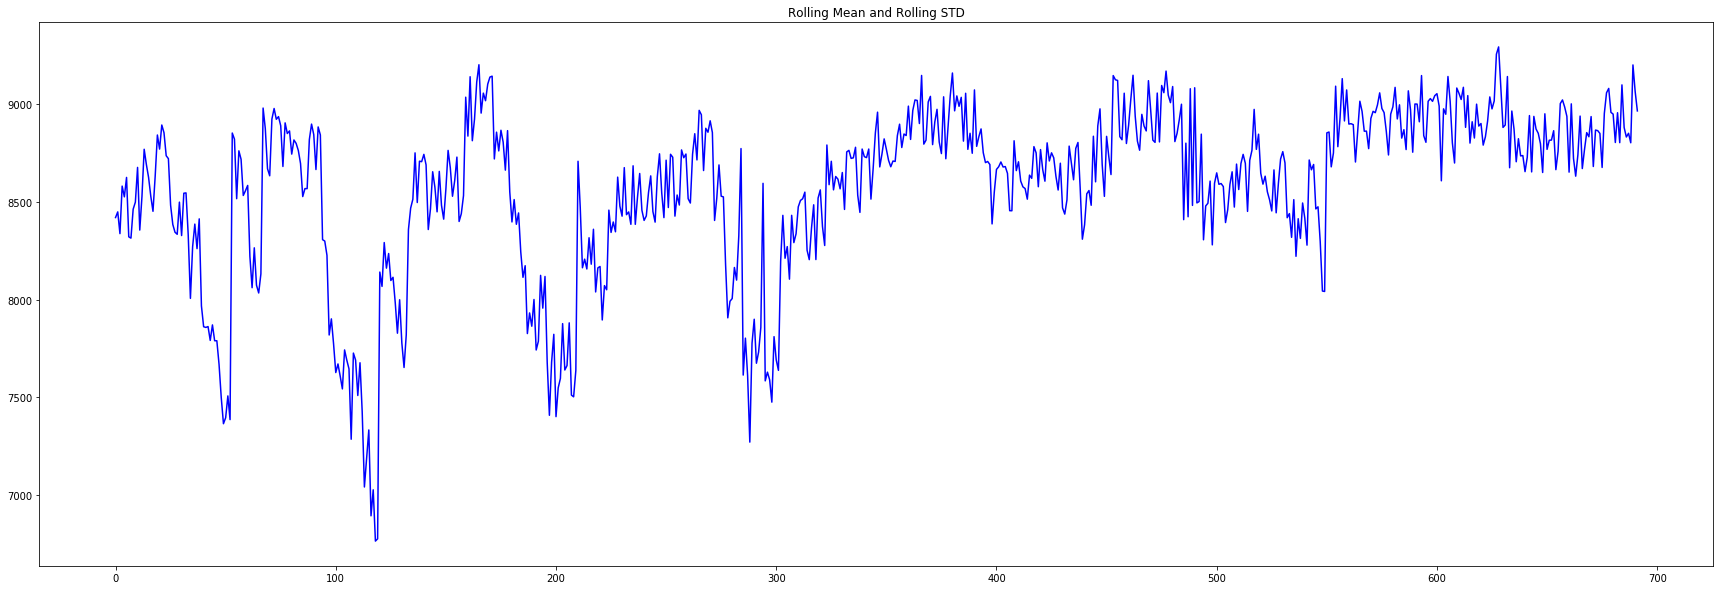

In [31]:
plt.figure(figsize=(30,10))
orig = plt.plot(train_df["GrocerySales"], color='blue', label='ORIGINAL')
# mean = plt.plot(rol_mean, color='red', label='ROLLING_MEAN')
std = plt.plot(rol_std, color='black', label='ROLLING_STD')
plt.title("Rolling Mean and Rolling STD")
plt.show()

In [36]:
# Function to check Stationarity using Augmented Dickey Fuller Test
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(train_df['GrocerySales'])

Results of Dickey-Fuller Test:
Test Statistic                  -4.316546
p-value                          0.000416
#Lags Used                       2.000000
Number of Observations Used    689.000000
Critical Value (1%)             -3.439877
Critical Value (5%)             -2.865744
Critical Value (10%)            -2.569009
dtype: float64


In [37]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    
kpss_test(train_df['GrocerySales'])

Results of KPSS Test:
Test Statistic            1.323856
p-value                   0.010000
Lags Used                20.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Snehal\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Based on the adfuller and kpss test results we can say that the data is stationary

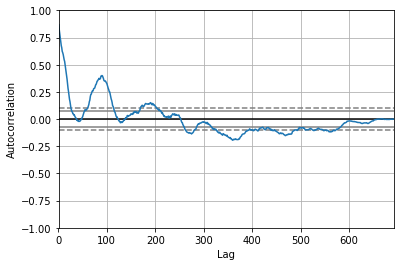

In [39]:
autocorrelation_plot(train_df["GrocerySales"])

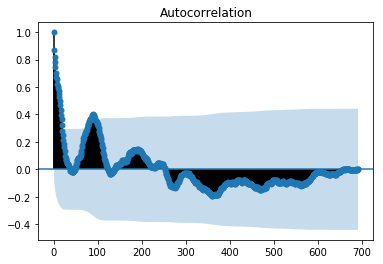

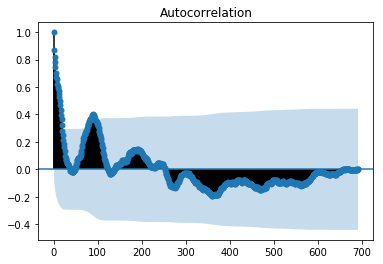

In [42]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train_df["GrocerySales"])